# Unit 5 - Financial Planning


In [271]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [272]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [273]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [274]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [275]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [276]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_usd = btc_response.json()['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_usd

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_usd = eth_response.json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_usd
my_eth_value = my_eth * eth_usd

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $12985.99
The current value of your 5.3 ETH is $1948.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [277]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [278]:
# Set Alpaca API key and secret
load_dotenv()
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [279]:
# Format current date as ISO format
today = pd.Timestamp("2020-09-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.24
Current SPY closing price: $330.69


In [280]:
# Compute the current value of shares
my_spy_shares = 50
my_agg_shares = 200
my_spy_value = spy_close_price * my_spy_shares
my_agg_value = agg_close_price * my_agg_shares

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16534.50
The current value of your 200 AGG shares is $23648.00


### Savings Health Analysis

In [281]:
# Create savings DataFrame
df = {
    'asset':['crypto','shares'],
    'amount':[(my_btc_value + my_eth_value),(my_spy_value + my_agg_value)]
    
}
df_savings = pd.DataFrame(data=df)
df_savings.set_index('asset',inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,14934.113
shares,40182.500


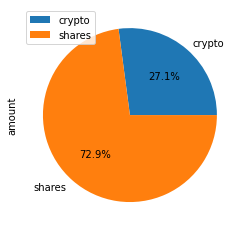

In [286]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', autopct='%1.1f%%')

In [296]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
#savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value
savings = 5000
# Validate saving health
if savings > emergency_fund:
    print('You have more than enough in savings.')
elif savings == emergency_fund:
    print('You have enough in savings.')
else:
    print('Unfortunately your savings is insufficient. You need at least ${:.0f} more.'.format(emergency_fund - savings))

Unfortunately your savings is insufficient. You need at least $31000 more.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [297]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [298]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [299]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
#df_stock_data.drop(columns=[('AGG', 'open'),('AGG','high'),('AGG','low'),('AGG','volume'),('SPY','open'),('SPY','high'),('SPY','low'),('SPY','volume')], inplace=True)

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [300]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [301]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999218,0.991848,0.987371,0.998282,0.996296,0.994657,1.016283,1.001391,1.004484,0.986715,...,0.997964,0.992581,1.008608,1.007067,0.996431,0.991351,0.995742,1.012772,1.023180,0.997072
2,1.009606,0.991389,0.986102,0.994913,0.999943,0.996290,1.019488,0.984700,1.010373,0.981869,...,1.003502,0.993648,1.015390,1.006649,0.994196,0.999562,0.991905,1.010221,1.028745,0.987822
3,1.007515,0.985123,0.990008,0.980645,1.003100,0.995365,1.006142,0.996140,1.021852,0.975816,...,1.000291,1.005588,1.018919,0.993900,0.987178,0.996874,0.994083,0.995682,1.021971,0.979155
4,1.005338,0.990546,0.996282,0.979012,1.009471,0.995313,1.001588,0.990035,1.034955,0.982222,...,1.019271,1.005728,1.027427,1.000416,1.005087,0.997640,0.988537,1.007708,1.029931,0.987157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.569037,8.678269,5.669150,5.932958,12.195077,5.533263,20.725925,57.850337,2.416528,10.208654,...,9.217515,13.399603,57.253199,5.654418,17.833037,7.450047,2.805235,5.525764,5.880408,18.897311
7557,11.634840,8.743446,5.739263,5.941969,12.089737,5.421722,20.780723,57.431484,2.443678,10.138019,...,9.136933,13.434550,57.234574,5.663778,17.880176,7.376832,2.767075,5.516397,5.903947,18.776906
7558,11.508619,8.721245,5.757823,5.858016,12.128269,5.473492,20.810145,57.371258,2.415813,10.141998,...,9.139566,13.354150,57.355586,5.673023,17.837482,7.406786,2.774667,5.514751,5.930092,18.796894
7559,11.427051,8.682965,5.753405,5.827845,12.212163,5.493980,20.557394,57.629179,2.403625,10.091915,...,9.240629,13.386202,57.763489,5.670981,17.942417,7.398965,2.770306,5.530975,5.997464,18.798006


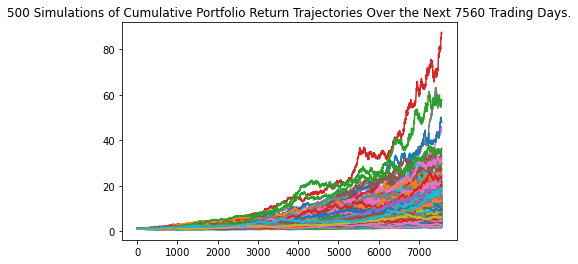

In [302]:
# Plot simulation outcomes
line_plot_thirty = MC_30year.plot_simulation()
line_plot_thirty.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches='tight')

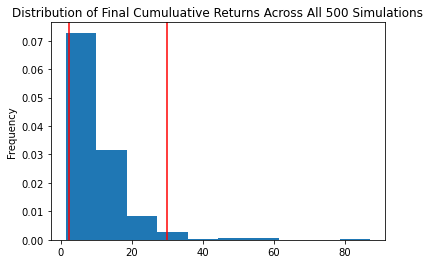

In [303]:
# Plot probability distribution and confidence intervals
dist_plot_thirty = MC_30year.plot_distribution()
dist_plot_thirty.get_figure().savefig('MC_30year_dist_plot.png', bbox_inches='tight')

### Retirement Analysis

In [304]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_thirty = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl_thirty)

count           500.000000
mean             10.108021
std               8.086350
min               1.390420
25%               5.225309
50%               7.832539
75%              12.621846
max              87.074461
95% CI Lower      2.175581
95% CI Upper     29.960505
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [309]:
# Set initial investment
initial_investment_thirty = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

lower_bound_thirty = tbl_thirty[8]
upper_bound_thirty = tbl_thirty[9]

#simulated_ending_prices = MC_30year.portfolio_data.iloc[-1,:]
#confidence_interval = simulated_ending_prices.quantile(q=[0.025,0.975])
ci_lower_thirty = initial_investment_thirty * lower_bound_thirty
ci_upper_thirty = initial_investment_thirty * upper_bound_thirty

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thirty} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty:,.2f} and ${ci_upper_thirty:,.2f}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43,511.61 and $599,210.10


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [311]:
# Set initial investment
initial_investment_five = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * lower_bound
ci_upper = initial_investment * upper_bound

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18,539.68 and $75,836.22


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [312]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [313]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002548,1.000098,1.002380,0.996070,1.000242,1.000164,1.003329,1.012226,1.006105,0.998900,...,1.002772,1.005583,0.996450,0.996758,1.008916,0.985551,1.018862,1.003416,1.013116,0.998031
2,1.011992,0.992386,0.998315,0.986091,0.997431,0.994879,0.998061,1.014260,1.001082,0.994782,...,1.006207,1.000231,0.996852,0.994856,1.010117,0.995545,1.014430,1.003558,1.010848,1.002579
3,1.017784,0.995771,0.992909,0.976981,0.999578,0.994429,1.005181,1.007198,1.014878,0.986929,...,1.006495,1.005350,1.007051,1.010979,1.006141,0.993974,1.007769,1.012308,1.013950,1.012652
4,1.025014,1.005026,0.982033,0.973676,0.987847,1.013413,0.994190,0.998564,1.026525,0.989608,...,1.012864,0.997206,0.997096,1.011802,1.004748,0.992879,1.004888,1.008534,1.009560,1.012628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.381280,1.490983,1.010226,1.303886,1.377128,1.526514,1.526806,1.326550,1.788755,1.342410,...,1.495908,1.166619,1.625873,1.549957,1.476394,1.543171,1.443035,1.141369,1.327058,1.624302
1257,1.381940,1.489485,1.019396,1.298528,1.366950,1.517292,1.511709,1.334876,1.774218,1.322469,...,1.499555,1.173490,1.606702,1.531748,1.479725,1.548775,1.447042,1.130284,1.333741,1.636191
1258,1.399696,1.475210,1.021695,1.293762,1.352267,1.503365,1.519155,1.337623,1.768167,1.322548,...,1.510594,1.163525,1.591436,1.552870,1.473403,1.558472,1.452720,1.145681,1.341461,1.638005
1259,1.418326,1.479641,1.025541,1.301614,1.362389,1.509720,1.528002,1.315528,1.766700,1.322391,...,1.499878,1.162335,1.607530,1.564490,1.466107,1.543059,1.449219,1.144331,1.347591,1.636310


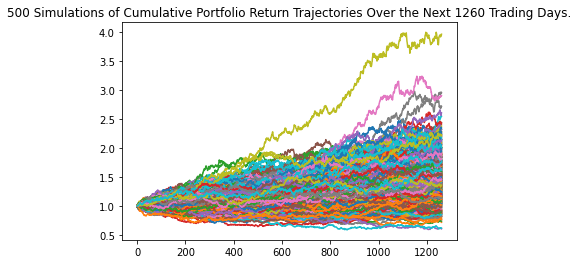

In [314]:
# Plot simulation outcomes
line_plot_five = MC_5year.plot_simulation()
line_plot_five.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches='tight')

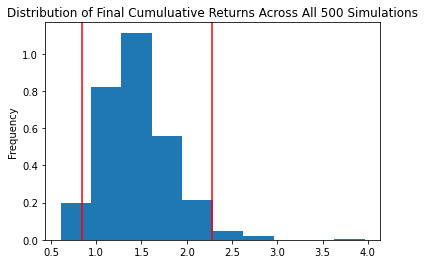

In [315]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_5year.plot_distribution()
dist_plot_five.get_figure().savefig('MC_5year_dist_plot.png', bbox_inches='tight')

In [316]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.458357
std               0.383206
min               0.605663
25%               1.186998
50%               1.417093
75%               1.658868
max               3.967277
95% CI Lower      0.843025
95% CI Upper      2.280104
Name: 1260, dtype: float64


In [317]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_bound_five = tbl_five[8]
upper_bound_five = tbl_five[9]
ci_lower_five = initial_investment_five * lower_bound_five
ci_upper_five = initial_investment_five * upper_bound_five

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16,860.50 and $45,602.07


### Ten Years Retirement Option

In [318]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [319]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998591,1.003668,0.993836,1.001031,0.998992,1.006410,1.007524,0.994493,1.001465,0.994094,...,1.006137,1.003713,0.998137,0.993503,0.992959,1.000156,0.997739,0.995182,0.989351,1.001624
2,0.998793,1.008730,1.002178,1.001158,0.998814,1.003165,1.013745,1.003421,1.016054,0.991874,...,1.020289,1.010255,1.002948,0.988254,0.997461,1.000564,0.987166,0.997174,0.979851,0.995399
3,1.011544,1.007455,1.005031,1.005021,1.001214,1.017526,1.005787,1.019510,1.020091,1.006218,...,1.029309,1.003657,1.000423,0.992135,1.003652,1.009674,0.984773,0.995346,0.988593,0.999568
4,1.019592,1.019994,0.999735,1.024128,1.008899,1.011622,1.014434,1.017247,1.002809,1.002846,...,1.031242,1.000339,1.005242,0.990812,1.004444,1.007638,0.976299,1.001651,0.982892,1.008963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.665622,1.415428,3.099346,1.609305,1.661453,1.809230,3.240949,0.986130,1.347084,2.442322,...,1.947341,1.854846,2.168271,2.232623,1.492279,3.096475,2.196634,1.361770,2.138400,1.802958
2517,2.672386,1.406453,3.069440,1.616692,1.630156,1.795454,3.250159,0.993548,1.349965,2.439644,...,1.952469,1.870753,2.179767,2.218317,1.479861,3.065353,2.194006,1.371547,2.152746,1.812023
2518,2.687689,1.395022,3.090319,1.614307,1.640457,1.775627,3.246810,0.994648,1.354355,2.427820,...,1.964012,1.864674,2.180376,2.222249,1.479013,3.044504,2.188296,1.365375,2.151580,1.793530
2519,2.685592,1.401783,3.122553,1.603000,1.626943,1.787713,3.275556,0.998223,1.332831,2.432027,...,1.951096,1.866357,2.177405,2.228841,1.484199,3.009408,2.186082,1.364926,2.137509,1.802808


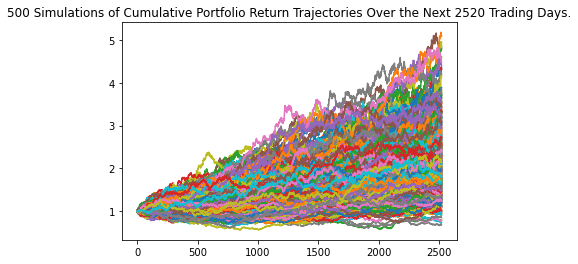

In [320]:
# Plot simulation outcomes
line_plot_ten = MC_10year.plot_simulation()
line_plot_ten.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches='tight')

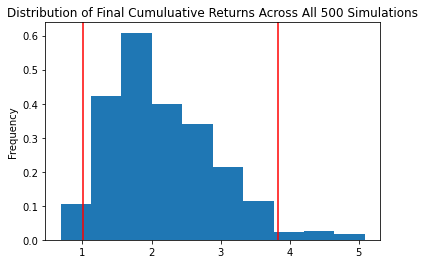

In [321]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_10year.plot_distribution()
dist_plot_ten.get_figure().savefig('MC_10year_dist_plot.png', bbox_inches='tight')

In [322]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.151307
std               0.779748
min               0.682959
25%               1.598657
50%               2.003437
75%               2.605223
max               5.087402
95% CI Lower      1.002176
95% CI Upper      3.836380
Name: 2520, dtype: float64


In [323]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_bound_ten = tbl_ten[8]
upper_bound_ten = tbl_ten[9]
ci_lower_ten = initial_investment_ten * lower_bound_ten
ci_upper_ten = initial_investment_ten * upper_bound_ten

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20,043.51 and $76,727.59
